In [45]:
import math
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from typing import Callable

In [46]:
func = lambda x, y : y * np.tan(x) - 2/3 * y**4*np.sin(x)
y_0_ = float(input("Введите нальное условие"))

a = float(input("Введите начало дифферинцирования"))
b = float(input("Введите конец дифферинцирования"))
eps = float(input("Введите погрешность"))

In [47]:
class ISolveDifferential(ABC):

    _func : Callable[[float, float], float]

    def __init__(self, func : Callable[[float, float], float]) -> None:
        self._func = func

    def _draw(self, x : np.ndarray, y : np.ndarray) -> None:
        plt.plot(x, y)
        plt.show()
    
    @abstractmethod
    def _get_error(self, y_prev : np.ndarray, y_current : np.ndarray) -> float:
        pass

    @abstractmethod
    def solve(self, a : float, b : float, start_y : float,
              eps : float, is_draw : bool, save_path : str) -> np.ndarray:
        raise NotImplementedError

In [48]:
class Euler(ISolveDifferential):

    def __init__(self, func : Callable[[float, float], float]) -> None:
        super().__init__(func)

    def _get_error(self, y_prev : np.ndarray, y_current : np.ndarray) -> float:
        m = -1
        for i in range(0, len(y_prev)):
            m = max(m, np.abs(y_prev[i] - y_current[2*i]))
        return m

    def solve(self, a : float, b : float, start_y : float, eps : float = 0.01,
               is_draw : bool = False, save_path : str = None) -> np.ndarray:
        n = 6
        x = np.linspace(a, b, n)
        h = (b-a)/n
        y_prev = np.full(n//2, np.inf)
        y_curr = np.full(n, np.inf)
        y_curr[0] = start_y
        while self._get_error(y_prev, y_curr) > eps:
            y_prev = y_curr
            n *= 2
            h = (b-a)/n
            y_curr = np.zeros(n)
            y_curr[0] = start_y
            x = np.linspace(a, b, n)

            for i in range(1, len(x)):
                y_curr[i] = y_curr[i-1] + h * func(x[i-1], y_curr[i-1])

        if is_draw:
            self._draw(x, y_curr)

        if save_path is not None:
            np.savetxt(save_path, y_curr, fmt='%.6f')

        return y_curr

        


C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_9720\345469249.py:9: RuntimeWarning: invalid value encountered in double_scalars
  m = max(m, np.abs(y_prev[i] - y_current[2*i]))


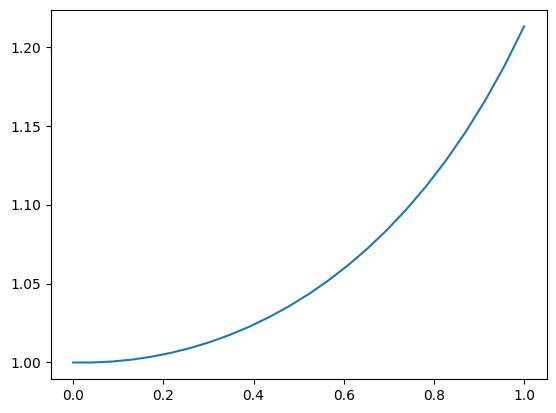

array([1.        , 1.        , 1.00060539, 1.00182167, 1.00365812,
       1.00612791, 1.00924831, 1.01304101, 1.01753248, 1.02275443,
       1.02874448, 1.03554687, 1.04321344, 1.05180482, 1.06139191,
       1.07205778, 1.0839    , 1.0970337 , 1.11159549, 1.12774853,
       1.14568931, 1.16565663, 1.18794396, 1.21291652])

In [49]:
euler = Euler(func)
euler.solve(a, b, y_0_, eps, is_draw =True, save_path="euler_solve.txt")


In [50]:
class EulerKoshi(ISolveDifferential):

    def __init__(self, func : Callable[[float, float], float]) -> None:
        super().__init__(func)

    def _get_error(self, y_prev : np.ndarray, y_current : np.ndarray) -> float:
        m = -1
        for i in range(0, len(y_prev)):
            m = max(m, np.abs(y_prev[i] - y_current[2*i]))
        return 1/3 * m

    def solve(self, a : float, b : float, start_y : float, eps : float = 0.01,
               is_draw : bool = False, save_path : str = None) -> np.ndarray:
        n = 6
        x = np.linspace(a, b, n)
        h = (b-a)/n
        y_prev = np.full(n//2, np.inf)
        y_curr = np.full(n, np.inf)
        y_curr[0] = start_y
        while self._get_error(y_prev, y_curr) > eps:
            y_prev = y_curr
            n *= 2
            h = (b-a)/n
            y_curr = np.zeros(n)
            y_curr[0] = start_y
            x = np.linspace(a, b, n)

            for i in range(1, len(x)):
                y_tilda = h * func(x[i-1], y_curr[i-1]) + y_curr[i-1]
                y_curr[i] = y_curr[i-1] + h * (func(x[i-1], y_curr[i-1]) +
                                               func(x[i], y_tilda))/2

        if is_draw:
            self._draw(x, y_curr)

        if save_path is not None:
            np.savetxt(save_path, y_curr, fmt='%.6f')

        return y_curr
    
   
    

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_9720\3285158441.py:9: RuntimeWarning: invalid value encountered in double_scalars
  m = max(m, np.abs(y_prev[i] - y_current[2*i]))


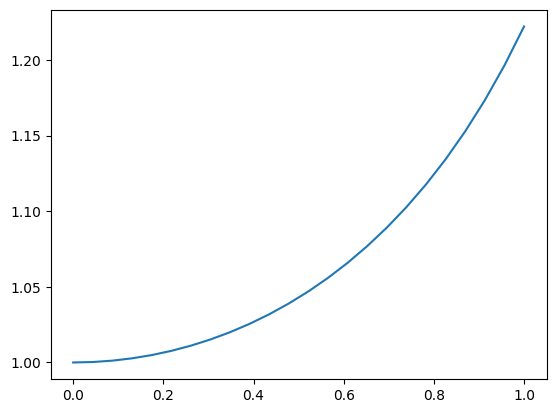

array([1.        , 1.00030269, 1.00121216, 1.00273396, 1.00487744,
       1.00765594, 1.01108699, 1.01519263, 1.01999983, 1.02554102,
       1.0318547 , 1.03898633, 1.04698925, 1.05592605, 1.0658701 ,
       1.07690758, 1.08914   , 1.10268753, 1.11769318, 1.13432836,
       1.15280024, 1.17336173, 1.1963251 , 1.22208114])

In [51]:
euler_koshi = EulerKoshi(func)
euler_koshi.solve(a, b, y_0_, eps, is_draw =True,
                   save_path="euler_koshi_solve.txt")

In [52]:
class RungeKutta(ISolveDifferential):

    def __init__(self, func : Callable[[float, float], float]) -> None:
        super().__init__(func)

    def _get_error(self, y_prev : np.ndarray, y_current : np.ndarray) -> float:
        m = -1
        for i in range(0, len(y_prev)):
            m = max(m, np.abs(y_prev[i] - y_current[2*i]))
        return m ** 2

    def solve(self, a : float, b : float, start_y : float, eps : float = 0.01,
               is_draw : bool = False, save_path : str = None) -> np.ndarray:
        n = 6
        x = np.linspace(a, b, n)
        h = (b-a)/n
        y_prev = np.full(n//2, np.inf)
        y_curr = np.full(n, np.inf)
        y_curr[0] = start_y
        while self._get_error(y_prev, y_curr) > eps:
            y_prev = y_curr
            n *= 2
            h = (b-a)/n
            y_curr = np.zeros(n)
            y_curr[0] = start_y
            x = np.linspace(a, b, n)

            for i in range(1, len(x)):
                k1 = h * func(x[i-1], y_curr[i-1])
                k2 = h * func(x[i-1] + h/2, y_curr[i-1] + k1/2)
                k3 = h * func(x[i-1] + h/2, y_curr[i-1] + k2/2)
                k4 = h * func(x[i-1] + h/2, y_curr[i-1] + k3/2)
                dy = 1/6 * (k1 + 2*k2 + 2*k3 + k4)
                y_curr[i] = y_curr[i-1] + dy

        if is_draw:
            self._draw(x, y_curr)

        if save_path is not None:
            np.savetxt(save_path, y_curr, fmt='%.6f')

        return y_curr

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_9720\2116800301.py:9: RuntimeWarning: invalid value encountered in double_scalars
  m = max(m, np.abs(y_prev[i] - y_current[2*i]))


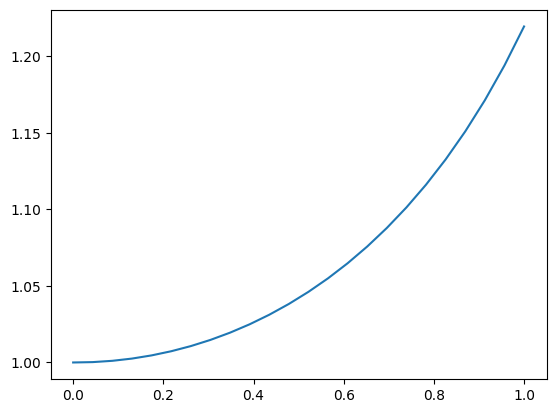

array([1.        , 1.00024116, 1.00108805, 1.00254613, 1.00462465,
       1.00733681, 1.01069998, 1.01473599, 1.01947155, 1.02493878,
       1.0311758 , 1.03822756, 1.04614682, 1.05499541, 1.06484577,
       1.07578288, 1.08790682, 1.10133586, 1.11621059, 1.1326993 ,
       1.15100508, 1.17137532, 1.19411487, 1.21960416])

In [53]:
runge_kutta = RungeKutta(func)
runge_kutta.solve(a, b, y_0_, eps, is_draw =True,
                   save_path="runge_kutta_solve.txt")